Enter the size of the maze: 3
Enter the maze configuration:
0 0 1
1 0 0
0 0 0
Training completed.
Enter the starting position (row column): 0 0
Enter the goal position (row column): 2 2
S * # 
# * * 
. . E 

* S # 
# * * 
. . E 

* * # 
# S * 
. . E 

* * # 
# * S 
. . E 

* * # 
# * * 
. . S 

Final version of the maze with the path taken:
S * # 
# * * 
. . E 



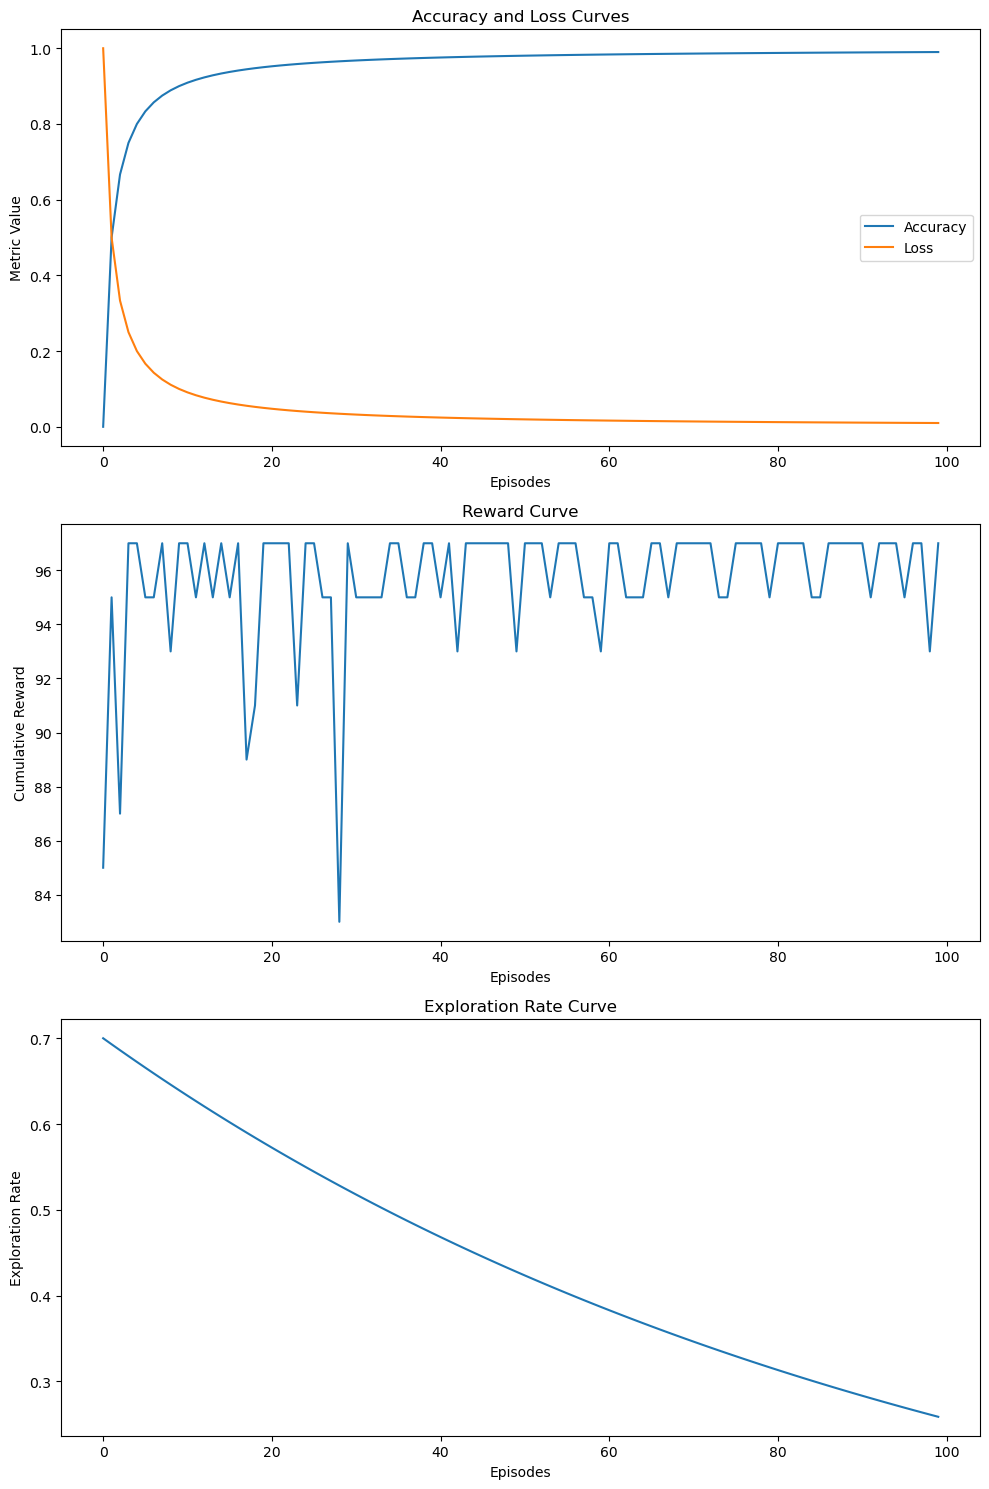

In [2]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

actions = [(0, -1), (-1, 0), (0, 1), (1, 0)]

def initialize_q_values(size):
    return np.zeros((size, size, len(actions)))

def choose_action(q_values, state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(len(actions)))
    else:
        return np.argmax(q_values[state])

def update_q_values(q_values, state, action, reward, next_state, alpha, gamma):
    q_values[state][action] += alpha * (reward + gamma * np.max(q_values[next_state]) - q_values[state][action])

def is_valid_position(maze, position):
    x, y = position
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != 1

def visualize_maze(maze, agent_position, goal_position, path=None):
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if (i, j) == agent_position:
                print("S", end=" ")
            elif (i, j) == goal_position:
                print("E", end=" ")
            elif (path is not None) and ((i, j) in path):
                print("*", end=" ")
            elif maze[i][j] == 1:
                print("#", end=" ")
            else:
                print(".", end=" ")
        print()
    print()

def train_maze_agent(maze_size, maze_config):
    episodes = 100
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.7

    maze = maze_config
    q_values = initialize_q_values(maze_size)
    agent_position = (0, 0)
    goal_position = (maze_size - 1, maze_size - 1)

    accuracy_curve = []
    loss_curve = []
    reward_curve = []
    exploration_curve = []

    for episode in range(episodes):
        state = agent_position
        episode_successful = False  
        total_reward = 0



        while state != goal_position:
            action = choose_action(q_values, state, epsilon)
            next_state = (state[0] + actions[action][0], state[1] + actions[action][1])

            if is_valid_position(maze, next_state):
                if next_state == goal_position:
                    reward = 100
                    episode_successful = True
                else:
                    reward = -1
                update_q_values(q_values, state, action, reward, next_state, alpha, gamma)
                state = next_state
                total_reward += reward
            else:
                update_q_values(q_values, state, action, -10, state, alpha, gamma)
                reward = -10  

        if episode_successful:
            success_rate = 1 / (episode + 1)  
        else:
            success_rate = 0  
        accuracy_curve.append(1 - success_rate)
        loss_curve.append(success_rate)
        reward_curve.append(total_reward)
        exploration_curve.append(epsilon)
        epsilon *= 0.99 

    print("Training completed.")
    return q_values, accuracy_curve, loss_curve, reward_curve, exploration_curve

def find_path(q_values, maze_config, start, goal):
    maze = maze_config
    agent_position = start
    path = [agent_position]

    while agent_position != goal:
        action = np.argmax(q_values[agent_position])
        next_position = (agent_position[0] + actions[action][0], agent_position[1] + actions[action][1])

        if is_valid_position(maze, next_position):
            agent_position = next_position
            path.append(agent_position)
        else:
            break

    return path


def main():
    maze_size = int(input("Enter the size of the maze: "))
    maze_config = []
    print("Enter the maze configuration:")
    for _ in range(maze_size):
        row = list(map(int, input().split()))
        maze_config.append(row)

    q_values, accuracy_curve, loss_curve, reward_curve, exploration_curve = train_maze_agent(maze_size, maze_config)

    start = tuple(map(int, input("Enter the starting position (row column): ").split()))
    goal = tuple(map(int, input("Enter the goal position (row column): ").split()))

    path = find_path(q_values, maze_config, start, goal)

    for position in path:
        visualize_maze(maze_config, position, goal, path)
        time.sleep(0.5)

    print("Final version of the maze with the path taken:")
    visualize_maze(maze_config, start, goal, path)


    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    axs[0].plot(range(len(accuracy_curve)), accuracy_curve, label='Accuracy')
    axs[0].plot(range(len(loss_curve)), loss_curve, label='Loss')
    axs[0].set_xlabel('Episodes')
    axs[0].set_ylabel('Metric Value')
    axs[0].set_title('Accuracy and Loss Curves')
    axs[0].legend()

    axs[1].plot(range(len(reward_curve)), reward_curve)
    axs[1].set_xlabel('Episodes')
    axs[1].set_ylabel('Cumulative Reward')
    axs[1].set_title('Reward Curve')

    axs[2].plot(range(len(exploration_curve)), exploration_curve)
    axs[2].set_xlabel('Episodes')
    axs[2].set_ylabel('Exploration Rate')
    axs[2].set_title('Exploration Rate Curve')

    plt.tight_layout()

    plt.show()


if __name__ == "__main__":
    main()
